## Load Data

This part is modified to load the Traffic Sign Classifier data, input image: (32x32x3), output: 43

In [9]:
# Load pickled data
import pickle

# TODO: Fill this in based on where you saved the training and testing data

training_file = 'train.p'
validation_file= 'valid.p'
testing_file = 'test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_validation, y_validation = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

assert(len(X_train) == len(y_train))
assert(len(X_validation) == len(y_validation))
assert(len(X_test) == len(y_test))

print()
print("Image Shape: {}".format(X_train[0].shape))
print()
print("Training Set:   {} samples".format(len(X_train)))
print("Validation Set: {} samples".format(len(X_validation)))
print("Test Set:       {} samples".format(len(X_test)))
print("Target outputs before shuffle:")
print(y_train[0:1000])


Image Shape: (32, 32, 3)

Training Set:   34799 samples
Validation Set: 4410 samples
Test Set:       12630 samples
[41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41
 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41
 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41
 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41
 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41
 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41
 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41
 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41
 41 41 41 41 41 41 41 41 41 41 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31
 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31
 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31
 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31

## Visualize Data

View a sample from the dataset.



Datasets Mean values BEFORE Normalization are: 

Training set : 82.6775890369964 
Validation set: 83.55642737563775 
Testing set : 82.14846036120183 
Trainint set dimension is: (34799, 32, 32, 3)


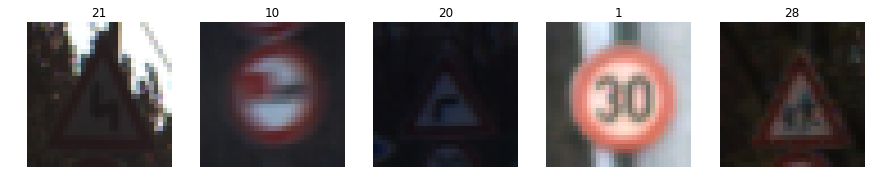

In [10]:
import random
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# visualize 5- random images from training dataset
fig, axs = plt.subplots(1,5, figsize=(15, 6))
fig.subplots_adjust(hspace = .2, wspace=.2)
axs = axs.ravel()
for i in range(5):
    index = random.randint(0, len(X_train))
    image = X_train[index]
    axs[i].axis('off')
    axs[i].imshow(image)
    axs[i].set_title(y_train[index])

# printing the mean values for every dataset
X_train_mean= np.mean(X_train)
X_validation_mean= np.mean(X_validation)
X_test_mean= np.mean(X_test)
print("Datasets Mean values BEFORE Normalization are: \n")
print("Training set : {} ".format(X_train_mean))
print("Validation set: {} ".format(X_validation_mean))
print("Testing set : {} ".format(X_test_mean))
print("Trainint set dimension is: {}".format(X_train.shape))

## Preprocess Data

Pre-process the Data Set (normalization, grayscale, etc.)
Minimally, the image data should be normalized so that the data has mean zero and equal variance. For image data, (pixel - 128)/ 128 is a quick way to approximately normalize the data and can be used in this project.

12
Grayscale Image Shape: (32, 32, 1)


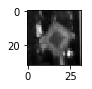

In [11]:

# Convert to grayscale, 
X_train = np.sum(X_train/3, axis=3, keepdims=True)
X_validation = np.sum(X_validation/3, axis=3, keepdims=True)
X_test = np.sum(X_test/3, axis=3, keepdims=True)




# visualize 1- Random image after grayscale conversion from training dataset
index = random.randint(0, len(X_train))
image = X_train[index].squeeze()
plt.figure(figsize=(1,1))
plt.imshow(image, cmap="gray")
print(y_train[index])

# printing the data image dimension now after converting to grayscale
print("Grayscale Image Shape: {}".format(X_train[0].shape))






18


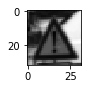

In [12]:
# Normalize the data (pixel - 128)/ 128

X_train = (X_train - 128)/128
X_validation = (X_validation - 128)/128
X_test = (X_test - 128)/128

# visualize 1- Random image after Normalization from training dataset
index = random.randint(0, len(X_train))
image = X_train[index].squeeze()
plt.figure(figsize=(1,1))
plt.imshow(image, cmap="gray")
print(y_train[index])

## Another method for Normalizing grayscale

Implement the Min-Max scaling function ($X'=a+{\frac {\left(X-X_{\min }\right)\left(b-a\right)}{X_{\max }-X_{\min }}}$) with the parameters:
$X_{\min }=0$
$X_{\max }=255$
$a=0.1$
$b=0.9$

5


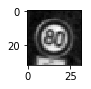

In [33]:
a = 0.1
b = 0.9
grayscale_min = 0
grayscale_max = 255

X_train = a + ( ( (X_train - grayscale_min)*(b - a) )/( grayscale_max - grayscale_min ) )
X_validation = a + ( ( (X_validation - grayscale_min)*(b - a) )/( grayscale_max - grayscale_min ) )
X_test = a + ( ( (X_test - grayscale_min)*(b - a) )/( grayscale_max - grayscale_min ) )

# visualize 1- Random image after Normalization from training dataset
index = random.randint(0, len(X_train))
image = X_train[index].squeeze()
plt.figure(figsize=(1,1))
plt.imshow(image, cmap="gray")
print(y_train[index])

In [13]:


# printing the mean values for every dataset
X_train_N_mean= np.mean(X_train)
X_validation_N_mean= np.mean(X_validation)
X_test_N_mean= np.mean(X_test)
print("Datasets Mean values AFTER Normalization are: \n")
print("Training set : {} ".format(X_train_N_mean))
print("Validation set: {} ".format(X_validation_N_mean))
print("Testing set : {} ".format(X_test_N_mean))
print("Trainint set dimension is: {}".format(X_train.shape))



Datasets Mean values AFTER Normalization are: 

Training set : -0.35408133564846583 
Validation set: -0.3472154111278294 
Testing set : -0.3582151534281105 
Trainint set dimension is: (34799, 32, 32, 1)



Shuffle the training data.


In [15]:
from sklearn.utils import shuffle

X_train, y_train = shuffle(X_train, y_train)
print("Target outputs after shuffle:")
print(y_train[0:1000])

print('done')

Target outputs after shuffle:
[28 10 38 29 35  2 17 11  5 10 33 15 41 15  2  7 18 15 14  8 40 18  3 29  2
 11  9 40 38 11 12  2 13  3 12  9  2 30 10  4 13  8 14 17 14 11 34 20 16 36
  5  7 33 30 26 35 36 36  4 15 11 12 29  8 35 25 11 12 28 15 12  7 30  2 34
  8 17 35 35 31 10  6 29 16 18  8 15  2 11 10  9 25  2 17 14  4 38 36  2 36
 26  9 34 17  2 18 13 38  8 25  3 25 10  5 23 38  3 17 11 18  7 35 12 30 14
 13  9 23 19  5  4 12  1  8 10  8 22 38  2  5  4 38 16 33  9 10 10 25  5  7
 13  2  7  4  9  4 18 24  2  9 40 22 12  6  8 22  9 13  4  2 33 13  5  8 20
 13 27  8  2  2 24 24 29 35  9  2  8  2  5 21 17  1  1 25 39 13 28 28  7  1
 24 12 14 12 10 25 30 12 12 16 30 10 10 40  2 24 17  7 22  9 28 11  4 26  2
  9 16 10 38  2 32  2  1 18 15 13  4 17 16 29  9 33 22  1 26 33  2 13 20  9
  2 26 25  8 14 25 18  9 17 20 35 40 17 42  5 21  2 18  2 33 30  7 15  3 11
 11  9 40  9  7 12 40 10 15  7 40  2 35  1 12 23  2 26 10  6  8 25  9 38 13
 13  3 13  4 29 17 12  3 12  1 18  1  4  9 38 31 33 35  1 

###  Augmenting Training set

Augmenting the training set might help improve model performance. Common data augmentation techniques include rotation, translation, zoom, flips, and/or color perturbation. These techniques can be used individually or combined.


In this section, I used the input data processing techniques as suggested by the paper, now I have a jittered dataset by adding 5
transformed versions of the original training set, yielding
173,995 samples in total and a validation set of 22,050 samples.

Image dimension before scaling:  (32, 32, 1)
An Image before Scaling: 
An Image after Scaling: 

Image Shape: (32, 32, 1)

Training Set:   69598 samples
Validation Set: 4410 samples
Test Set:       12630 samples


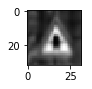

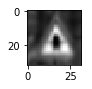

In [26]:
# Adding rotated images as more samples
# transrom the input data to rotated data then add to the input and shuffle both, expecting to have # of training samples= 69,598
# and # of validation samples= 8820 samples
import cv2

def Scaling(input): 
    output = []
    print("Image dimension before scaling: ", input[0].shape)
    for i in range (len(input)):
        rows,cols,_ = input[i].shape

        # transform limits
        px = np.random.randint(-2,2)
        
        # ending locations
        pts1 = np.float32([[px,px],[rows-px,px],[px,cols-px],[rows-px,cols-px]])
        
        # starting locations (4 corners)
        pts2 = np.float32([[0,0],[rows,0],[0,cols],[rows,cols]])
        
        M = cv2.getPerspectiveTransform(pts1,pts2)
        img = cv2.warpPerspective(input[i],M,(rows,cols))
        img = img[:,:,np.newaxis]
        output.append(img)
    
    
    return output


input = X_train
X_train_scaled= Scaling(input)
# display an Image before and after Scaling

print ("An Image before Scaling: ")
image = X_train[10].squeeze()
plt.figure(figsize=(1,1))
plt.imshow(image, cmap="gray")


print ("An Image after Scaling: ")
image = X_train_scaled[10].squeeze()
plt.figure(figsize=(1,1))
plt.imshow(image, cmap="gray")

X_train = np.concatenate((X_train, X_train_scaled), axis=0)
y_train = np.concatenate((y_train, y_train), axis=0)




# Shuffle new training data
X_train, y_train = shuffle(X_train, y_train)

print()
print("Image Shape: {}".format(X_train[0].shape))
print()
print("Training Set:   {} samples".format(len(X_train)))
print("Validation Set: {} samples".format(len(X_validation)))
print("Test Set:       {} samples".format(len(X_test)))



## Setup TensorFlow
The `EPOCH` and `BATCH_SIZE` values affect the training speed and model accuracy.

You do not need to modify this section.

In [36]:
import tensorflow as tf

EPOCHS = 100
BATCH_SIZE = 150
dropout = 0.6

## Original LeNet-5
Implement the [LeNet-5](http://yann.lecun.com/exdb/lenet/) neural network architecture.
![LeNet Architecture](lenet.png)
Source: Yan LeCun



### Input
The LeNet architecture accepts a 32x32xC image as input, where C is the number of color channels. C is 1 in this case, since we are working on a grayscale Images.

### Architecture
**Layer 1: Convolutional.** The output shape should be 28x28x6.

**Activation.** Your choice of activation function.

**Pooling.** The output shape should be 14x14x6.

**Layer 2: Convolutional.** The output shape should be 10x10x16.

**Activation.** Your choice of activation function.

**Pooling.** The output shape should be 5x5x16.

**Flatten.** Flatten the output shape of the final pooling layer such that it's 1D instead of 3D. The easiest way to do is by using `tf.contrib.layers.flatten`, which is already imported for you.

**Layer 3: Fully Connected.** This should have 120 outputs.

**Activation.** Your choice of activation function.

**Layer 4: Fully Connected.** This should have 84 outputs.

**Activation.** Your choice of activation function.

**Layer 5: Fully Connected (Logits).** This should have 43 outputs.

### Output
Return the result of the 2nd fully connected layer.

In [17]:
from tensorflow.contrib.layers import flatten

def LeNet(x):    
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
    mu = 0
    sigma = 0.1
    
    # SOLUTION: Layer 1: Convolutional. Input = 32x32x1. Output = 28x28x6.
    conv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 1, 6), mean = mu, stddev = sigma))
    conv1_b = tf.Variable(tf.zeros(6))
    conv1   = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b

    # SOLUTION: Activation.
    conv1 = tf.nn.relu(conv1)

    # SOLUTION: Pooling. Input = 28x28x6. Output = 14x14x6.
    conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # SOLUTION: Layer 2: Convolutional. Output = 10x10x16.
    conv2_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 6, 16), mean = mu, stddev = sigma))
    conv2_b = tf.Variable(tf.zeros(16))
    conv2   = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b
    
    # SOLUTION: Activation.
    conv2 = tf.nn.relu(conv2)

    # SOLUTION: Pooling. Input = 10x10x16. Output = 5x5x16.
    conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # SOLUTION: Flatten. Input = 5x5x16. Output = 400.
    fc0   = flatten(conv2)
    
    
    # SOLUTION: Layer 3: Fully Connected. Input = 400. Output = 120.
    fc1_W = tf.Variable(tf.truncated_normal(shape=(400, 120), mean = mu, stddev = sigma))
    fc1_b = tf.Variable(tf.zeros(120))
    fc1   = tf.matmul(fc0, fc1_W) + fc1_b
    
    # SOLUTION: Activation.
    fc1    = tf.nn.relu(fc1)
    

    # SOLUTION: Layer 4: Fully Connected. Input = 120. Output = 84.
    fc2_W  = tf.Variable(tf.truncated_normal(shape=(120, 84), mean = mu, stddev = sigma))
    fc2_b  = tf.Variable(tf.zeros(84))
    fc2    = tf.matmul(fc1, fc2_W) + fc2_b
    
    # SOLUTION: Activation.
    fc2    = tf.nn.relu(fc2)
    # ---> Using Dropout for Regularization 
    fc2 = tf.nn.dropout(fc2, dropout)

    # SOLUTION: Layer 5: Fully Connected. Input = 84. Output = 10.
    fc3_W  = tf.Variable(tf.truncated_normal(shape=(84, 43), mean = mu, stddev = sigma))
    fc3_b  = tf.Variable(tf.zeros(43))
    logits = tf.matmul(fc2, fc3_W) + fc3_b
    
    return logits
print('done')

done


## Modified LeNet5
Using Suggested Architecture in [Traffic Sign Recognition with Multi-Scale Convolutional Networks](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf)

![1-Suggested_Paper_Architecture.png](attachment:1-Suggested_Paper_Architecture.png)

In [37]:
def LeNet_modified(x):    
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
    # Hyperparameters
    mu = 0
    sigma = 0.1
    
    # TODO: Layer 1: Convolutional. Input = 32x32x1. Output = 28x28x6.
    W1 = tf.Variable(tf.truncated_normal(shape=(5, 5, 1, 6), mean = mu, stddev = sigma), name="W1")
    x = tf.nn.conv2d(x, W1, strides=[1, 1, 1, 1], padding='VALID')
    b1 = tf.Variable(tf.zeros(6), name="b1")
    x = tf.nn.bias_add(x, b1)
    print("layer 1 shape:",x.get_shape())

    # TODO: Activation.
    x = tf.nn.relu(x)
    
    # TODO: Pooling. Input = 28x28x6. Output = 14x14x6.
    x = tf.nn.max_pool(x, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')
    layer1 = x
    
    # TODO: Layer 2: Convolutional. Output = 10x10x16.
    W2 = tf.Variable(tf.truncated_normal(shape=(5, 5, 6, 16), mean = mu, stddev = sigma), name="W2")
    x = tf.nn.conv2d(x, W2, strides=[1, 1, 1, 1], padding='VALID')
    b2 = tf.Variable(tf.zeros(16), name="b2")
    x = tf.nn.bias_add(x, b2)
                     
    # TODO: Activation.
    x = tf.nn.relu(x)

    # TODO: Pooling. Input = 10x10x16. Output = 5x5x16.
    x = tf.nn.max_pool(x, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')
    layer2 = x
    
    # TODO: Layer 3: Convolutional. Output = 1x1x400.
    W3 = tf.Variable(tf.truncated_normal(shape=(5, 5, 16, 400), mean = mu, stddev = sigma), name="W3")
    x = tf.nn.conv2d(x, W3, strides=[1, 1, 1, 1], padding='VALID')
    b3 = tf.Variable(tf.zeros(400), name="b3")
    x = tf.nn.bias_add(x, b3)
                     
    # TODO: Activation.
    x = tf.nn.relu(x)
    layer3 = x

    # TODO: Flatten. Input = 5x5x16. Output = 400.
    layer2flat = flatten(layer2)
    print("layer2flat shape:",layer2flat.get_shape())
    
    # Flatten x. Input = 1x1x400. Output = 400.
    xflat = flatten(x)
    print("xflat shape:",xflat.get_shape())
    
    # Concat layer2flat and x. Input = 400 + 400. Output = 800
    x = tf.concat_v2([xflat, layer2flat], 1)
    print("x shape:",x.get_shape())
    
    # Dropout
    x = tf.nn.dropout(x, dropout)
    
    # TODO: Layer 4: Fully Connected. Input = 800. Output = 43.
    W4 = tf.Variable(tf.truncated_normal(shape=(800, 43), mean = mu, stddev = sigma), name="W4")
    b4 = tf.Variable(tf.zeros(43), name="b4")    
    logits = tf.add(tf.matmul(x, W4), b4)
    
    # TODO: Activation.
    #x = tf.nn.relu(x)

    # TODO: Layer 5: Fully Connected. Input = 120. Output = 84.
    #W5 = tf.Variable(tf.truncated_normal(shape=(120, 84), mean = mu, stddev = sigma))
    #b5 = tf.Variable(tf.zeros(84)) 
    #x = tf.add(tf.matmul(x, W5), b5)
    
    # TODO: Activation.
    #x = tf.nn.relu(x)

    # TODO: Layer 6: Fully Connected. Input = 84. Output = 43.
    #W6 = tf.Variable(tf.truncated_normal(shape=(84, 43), mean = mu, stddev = sigma))
    #b6 = tf.Variable(tf.zeros(43)) 
    #logits = tf.add(tf.matmul(x, W6), b6)
    
    return logits

print('done')

done


## Features and Labels
Train LeNet to classify [Traffic- Signs data](https://d17h27t6h515a5.cloudfront.net/topher/2017/February/5898cd6f_traffic-signs-data/traffic-signs-data.zip) data.

`x` is a placeholder for a batch of input images.
`y` is a placeholder for a batch of output labels.

You do not need to modify this section.

In [38]:
x = tf.placeholder(tf.float32, (None, 32, 32, 1))
y = tf.placeholder(tf.int32, (None))
one_hot_y = tf.one_hot(y, 43)

## Training Pipeline
Create a training pipeline that uses the model to classify data.

You do not need to modify this section.

In [39]:
rate = 0.0005

#logits = LeNet(x)
logits = LeNet_modified(x)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=one_hot_y, logits=logits)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

layer 1 shape: (?, 28, 28, 6)
layer2flat shape: (?, 400)
xflat shape: (?, 400)
x shape: (?, 800)


## Model Evaluation
Evaluate how well the loss and accuracy of the model for a given dataset.

You do not need to modify this section.

In [40]:
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

## Train the Model
Run the training data through the training pipeline to train the model.

Before each epoch, shuffle the training set.

After each epoch, measure the loss and accuracy of the validation set.

Save the model after training.

You do not need to modify this section.

In [41]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    
    print("Training...")
    print()
    for i in range(EPOCHS):
        X_train, y_train = shuffle(X_train, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y})
            
        validation_accuracy = evaluate(X_validation, y_validation)
        print("EPOCH {} ...".format(i+1))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()
        
    saver.save(sess, './lenet')
    print("Model saved")

Training...

EPOCH 1 ...
Validation Accuracy = 0.529

EPOCH 2 ...
Validation Accuracy = 0.714

EPOCH 3 ...
Validation Accuracy = 0.775

EPOCH 4 ...
Validation Accuracy = 0.813

EPOCH 5 ...
Validation Accuracy = 0.851

EPOCH 6 ...
Validation Accuracy = 0.835

EPOCH 7 ...
Validation Accuracy = 0.868

EPOCH 8 ...
Validation Accuracy = 0.869

EPOCH 9 ...
Validation Accuracy = 0.863

EPOCH 10 ...
Validation Accuracy = 0.869

EPOCH 11 ...
Validation Accuracy = 0.890

EPOCH 12 ...
Validation Accuracy = 0.891

EPOCH 13 ...
Validation Accuracy = 0.888

EPOCH 14 ...
Validation Accuracy = 0.889

EPOCH 15 ...
Validation Accuracy = 0.894

EPOCH 16 ...
Validation Accuracy = 0.899

EPOCH 17 ...
Validation Accuracy = 0.895

EPOCH 18 ...
Validation Accuracy = 0.899

EPOCH 19 ...
Validation Accuracy = 0.901

EPOCH 20 ...
Validation Accuracy = 0.904

EPOCH 21 ...
Validation Accuracy = 0.904

EPOCH 22 ...
Validation Accuracy = 0.905

EPOCH 23 ...
Validation Accuracy = 0.900

EPOCH 24 ...
Validation Accura

## Evaluate the Model
Once you are completely satisfied with your model, evaluate the performance of the model on the test set.

Be sure to only do this once!

If you were to measure the performance of your trained model on the test set, then improve your model, and then measure the performance of your model on the test set again, that would invalidate your test results. You wouldn't get a true measure of how well your model would perform against real data.

You do not need to modify this section.

In [ ]:
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))

    test_accuracy = evaluate(X_test, y_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy))